### Imports

In [15]:
import pandas as pd
import numpy as np

from sklearn import model_selection as skms

# import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


### Load csv data into pandas dataframe
#### We want our actual feature data to drop the output column

In [16]:
heart_data = pd.read_csv('heart.csv')
heart_feature = heart_data.drop('output', axis = 1)

In [17]:
heart_data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
heart_feature.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


### Retrieve correlation between columns

In [19]:
heart_data.corr(method = 'pearson')

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


### Since it's hard to understand what some of these features are, we add descriptions to each feature
1. age - age in years

2. sex - sex (1 = male; 0 = female)

3. cp - chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 0 = asymptomatic)

4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)

5. chol - serum cholestoral in mg/dl

6. fbs - fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

7. restecg - resting electrocardiographic results (1 = normal; 2 = having ST-T wave abnormality; 0 = hypertrophy)

8. thalach - maximum heart rate achieved

9. exang - exercise induced angina (1 = yes; 0 = no)

10. oldpeak - ST depression induced by exercise relative to rest

11. slope - the slope of the peak exercise ST segment (2 = upsloping; 1 = flat; 0 = downsloping)

12. ca - number of major vessels (0-3) colored by flourosopy

13. thal - 2 = normal; 1 = fixed defect; 3 = reversable defect

14. num - the predicted attribute - diagnosis of heart disease (angiographic disease status) (Value 0 = < diameter narrowing; Value 1 = > 50% diameter narrowing) 

### Perform a description of the data

In [20]:
heart_data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [21]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### The data looks clean (no nulls and no object as the dtype)
So we plot the outputs

In [22]:
px.histogram(heart_data, x = 'output', color = 'output', template = 'plotly_dark')

In [23]:
px.histogram(heart_data, x = 'age', color = 'output', template = 'plotly_dark')

In [24]:
px.histogram(heart_data, x = 'chol', color = 'output', template = 'plotly_dark')

### Heatmap of the correlation (We do not necessarily perform feature filtering based on correlation)

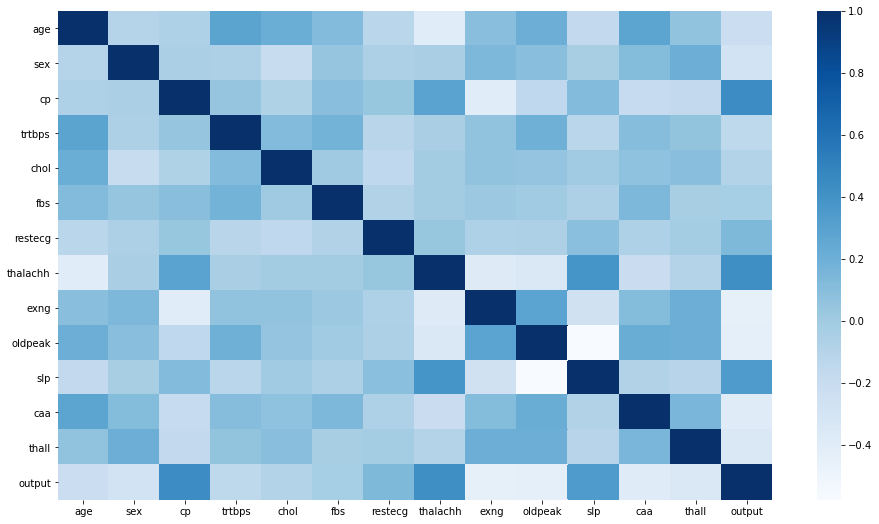

In [25]:
# FIGURE OUT HOW TO DO THIS IN PLOTLY BECAUSE PLOTLY IS BEST YESSIR!
plt.figure(figsize = (16, 9))
sns.heatmap(heart_data.corr(), cmap = 'Blues')
plt.show()


### We plan on using all the features in this dataset

In [41]:
# Create training, validation, and testing datasets
split_ratios = {
    'train': 0.70,
    'validation': 0.2,
    'test': 0.1
}

train, test = skms.train_test_split(heart_data, train_size = split_ratios['train'])
train = train.reset_index()
val, test = skms.train_test_split(test, train_size = split_ratios['validation'] / (1 - split_ratios['train']))
val = val.reset_index()
test = test.reset_index()

In [42]:
train

,index,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,83,52,1,3,152,298,1,1,178,0,1.2,1,0,3,1
1,42,45,1,0,104,208,0,0,148,1,3.0,1,0,2,1
2,183,58,1,2,112,230,0,0,165,0,2.5,1,1,3,0
3,18,43,1,0,150,247,0,1,171,0,1.5,2,0,2,1
4,80,41,1,2,112,250,0,1,179,0,0.0,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,189,41,1,0,110,172,0,0,158,0,0.0,2,0,3,0
208,114,55,1,1,130,262,0,1,155,0,0.0,2,0,2,1
209,164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
210,269,56,1,0,130,283,1,0,103,1,1.6,0,0,3,0


In [43]:
val

,index,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,252,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
1,98,43,1,2,130,315,0,1,162,0,1.9,2,1,2,1
2,13,64,1,3,110,211,0,0,144,1,1.8,1,0,2,1
3,106,69,1,3,160,234,1,0,131,0,0.1,1,1,2,1
4,11,48,0,2,130,275,0,1,139,0,0.2,2,0,2,1
5,20,59,1,0,135,234,0,1,161,0,0.5,1,0,3,1
6,259,38,1,3,120,231,0,1,182,1,3.8,1,0,3,0
7,63,41,1,1,135,203,0,1,132,0,0.0,1,0,1,1
8,226,62,1,1,120,281,0,0,103,0,1.4,1,1,3,0
9,297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0


In [44]:
test

,index,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,268,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0
1,249,69,1,2,140,254,0,0,146,0,2.0,1,3,3,0
2,51,66,1,0,120,302,0,0,151,0,0.4,1,0,2,1
3,273,58,1,0,100,234,0,1,156,0,0.1,2,1,3,0
4,247,66,1,1,160,246,0,1,120,1,0.0,1,3,1,0
5,289,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0
6,46,44,1,2,140,235,0,0,180,0,0.0,2,0,2,1
7,283,40,1,0,152,223,0,1,181,0,0.0,2,0,3,0
8,291,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
9,272,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0
